# Financial news classification and ranking
---

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import re
import nltk

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\AYA\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
df=pd.read_csv("data/raw/news.csv")

In [3]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427482 entries, 0 to 427481
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       427482 non-null  object 
 1   news       427482 non-null  object 
 2   neg        427482 non-null  float64
 3   neu        427482 non-null  float64
 4   pos        427482 non-null  float64
 5   compound   427482 non-null  float64
 6   sentiment  427482 non-null  object 
dtypes: float64(4), object(3)
memory usage: 22.8+ MB
None


In [4]:
# Check the first few rows
df.head()

,date,news,neg,neu,pos,compound,sentiment
0,2007-07-07,It was a long antipodean night. While there’s ...,0.059000,0.87800,0.064000,0.051600,POSITIVE
1,2007-07-07,In Mexico there are no licensing or registrati...,0.044000,0.95600,0.000000,-0.296000,NEGATIVE
2,2007-07-07,The government has until Monday to protect the...,0.000000,0.89400,0.106000,0.381800,POSITIVE
3,2007-07-07,A record-breaking heat wave in the Southwest i...,0.197505,0.66149,0.141005,0.997491,POSITIVE
4,2007-07-07,England started its Live Earth concert at Wemb...,0.033000,0.94500,0.022000,-0.177900,NEGATIVE


##### Check for Missing & Duplicate Values

In [5]:
# Check for missing values
print(df.isnull().sum())


date         0
news         0
neg          0
neu          0
pos          0
compound     0
sentiment    0
dtype: int64


In [6]:
# Check for duplicate entries
print(df.duplicated().sum())

0


##### Analyze Sentiment Distribution

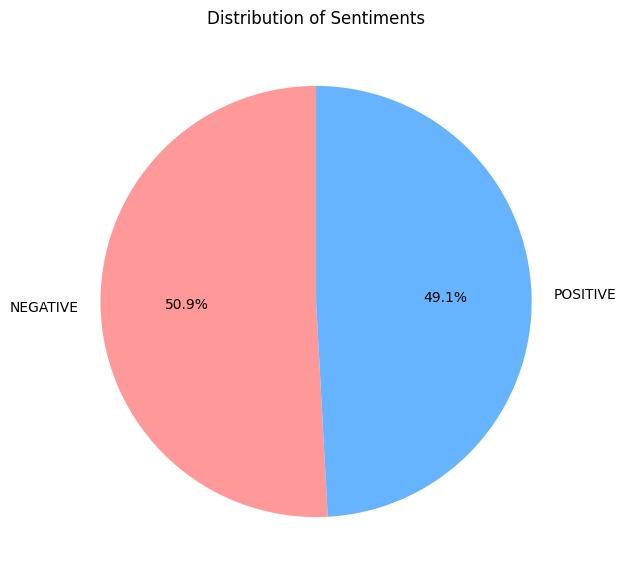

In [7]:
# Calculate the percentage of each sentiment
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title("Distribution of Sentiments")
plt.show()

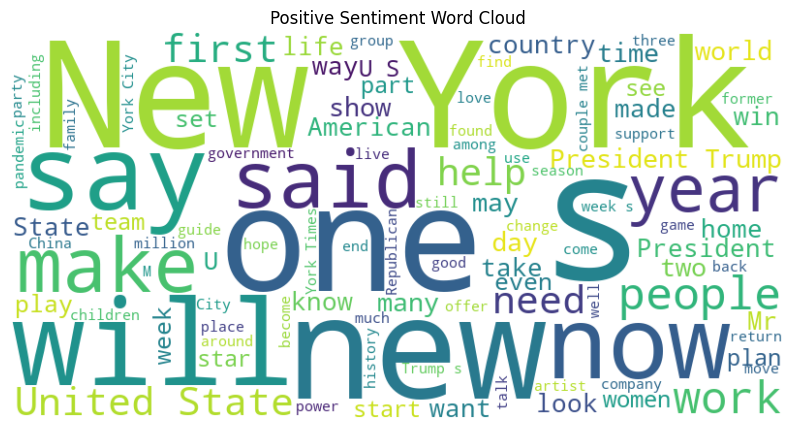

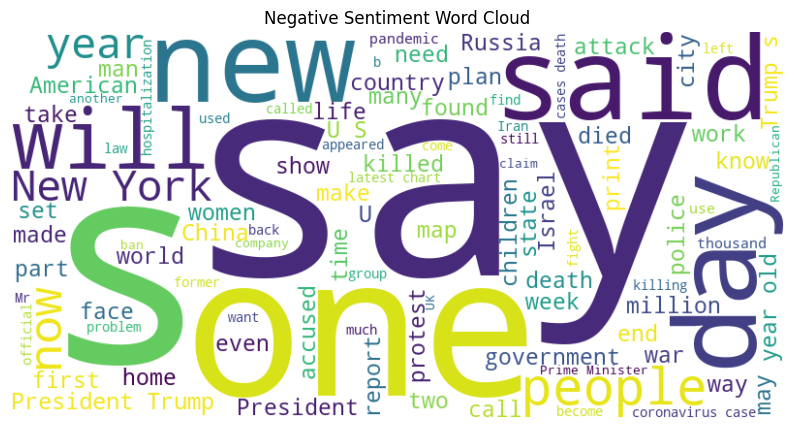

In [8]:
# Create a WordCloud object with customized settings
positive_news = df[df['sentiment'] == 'POSITIVE']['news']
negative_news = df[df['sentiment'] == 'NEGATIVE']['news']

def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        stopwords=STOPWORDS,  # Remove common stop words
        background_color='white',  # Set the background color
        width=800,  # Set the width of the image
        height=400,  # Set the height of the image
        max_words=100  # Set the maximum number of words to display
    ).generate(' '.join(text))  # Generate word cloud from text

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.title(title)
    plt.show()

# Generate WordCloud for positive sentiment news
generate_wordcloud(positive_news, "Positive Sentiment Word Cloud")

# Generate WordCloud for negative sentiment news
generate_wordcloud(negative_news, "Negative Sentiment Word Cloud")


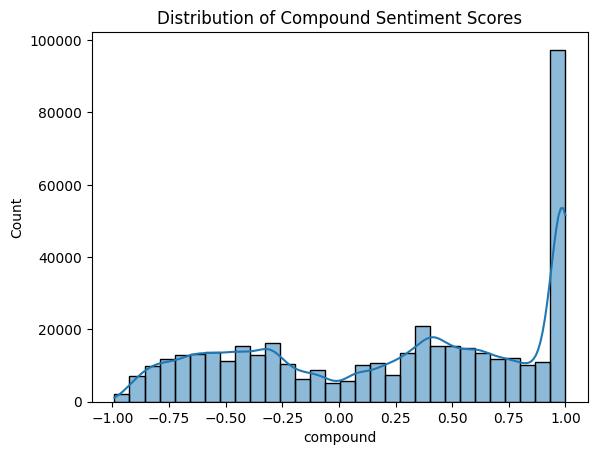

In [27]:
# Distribution of compound scores
sns.histplot(df['compound'], bins=30, kde=True)
plt.title("Distribution of Compound Sentiment Scores")
plt.show()

 #### Time-Series Analysis

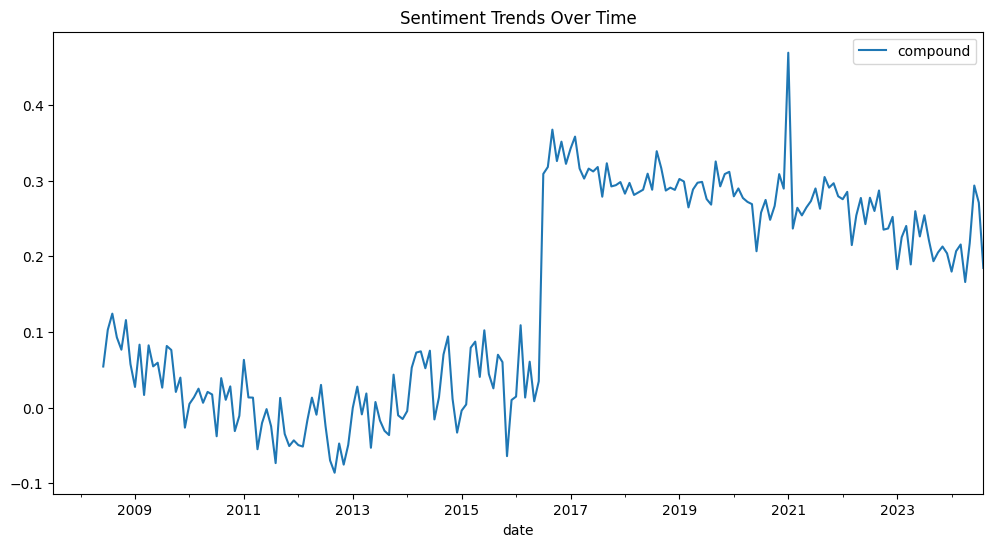

In [10]:
df['date'] = pd.to_datetime(df['date'])  # Convert to datetime
df.set_index('date', inplace=True)

# Rolling average of sentiment scores
df[['compound']].resample('M').mean().plot(figsize=(12, 6))
plt.title("Sentiment Trends Over Time")
plt.show()


In [9]:
# Function to replace emojis with text
def replace_emoji_with_text(text):
    return emoji.demojize(text)


In [ ]:
# Count the number of rows where 'has_emoji' is True
emoji_count = df['has_emoji'].sum()

# Print the result
print(f"Number of news articles with emojis: {emoji_count}")
# 17 = emojis

In [15]:
# Function to replace emojis with their textual description
def replace_emoji_with_text(text):
    return emoji.demojize(text)

# Apply the function to replace emojis in the news column
df['news_with_emoji_text'] = df['news'].apply(replace_emoji_with_text)

# Print the updated DataFrame to see the changes
print(df[['news', 'news_with_emoji_text']].head())


                                                         news  \
date                                                            
2007-07-07  It was a long antipodean night. While there’s ...   
2007-07-07  In Mexico there are no licensing or registrati...   
2007-07-07  The government has until Monday to protect the...   
2007-07-07  A record-breaking heat wave in the Southwest i...   
2007-07-07  England started its Live Earth concert at Wemb...   

                                         news_with_emoji_text  
date                                                           
2007-07-07  It was a long antipodean night. While there’s ...  
2007-07-07  In Mexico there are no licensing or registrati...  
2007-07-07  The government has until Monday to protect the...  
2007-07-07  A record-breaking heat wave in the Southwest i...  
2007-07-07  England started its Live Earth concert at Wemb...  
